## In-class activity : Detecting Sybil nodes

In [1]:
import networkx as nx
import random

#### As always, we first generate a network.

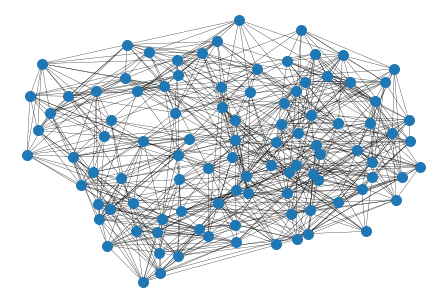

In [2]:
# Read network, create H
# H = nx.read_weighted_edgelist(sys.argv[1])
H = nx.watts_strogatz_graph(100, 15, 0.25)
#H=nx.karate_club_graph()
pos=nx.spring_layout(H)
nx.draw(H, pos, node_size=100, width=0.3)

#### However, this time around, we add nodes to it.
We will add the "fake" (Sybil) nodes around it. Here are the necessary parameters.

In [3]:
# Provide percentage of sybil, attack, and sybil connections
SybilPercentage=0.1
Attack_Edge=0.01
Sybil_Edge=0.8

In [4]:
# Adding Sybil nodes to network
nNodes = H.number_of_nodes()
nblue = H.nodes() # includes all "honest", true nodes
eblue = H.edges() # and all of the true connections.
nred = [] # will include all Sybil, "fake" nodes
ered = [] # and all fake connections.
for i in range(0, int(SybilPercentage * nNodes)):
    H.add_node(i + nNodes)
    nred.append(i + nNodes)

# uncomment to see the new (disconnected) graph
#pos=nx.spring_layout(H)
#nx.draw(H, pos, node_size=100, width=0.3) 
#nx.draw_networkx_nodes(H, pos, nodelist=nred, node_size=100)

In [5]:
# Adding attack edges to the network
for i in nred:
    for j in nblue:
        if random.random() < Attack_Edge:
            H.add_edge(j, i)
# uncomment to see the new graph, including the attack edges
#pos=nx.spring_layout(H)
#nx.draw(H, pos, node_size=100, width=0.3) 
#nx.draw_networkx_nodes(H, pos, nodelist=nred, node_size=100)

In [6]:
# Finally, adding Sybil edges to the network
for i in nred:
    for j in nred:
        if i != j:
            if random.random() < Sybil_Edge:
                H.add_edge(i, j)
# uncomment to see the new graph, including the attack edges
#pos=nx.spring_layout(H)
#nx.draw(H, pos, node_size=100, width=0.3) 
#nx.draw_networkx_nodes(H, pos, nodelist=nred, node_size=100)

#### We may visualize the fully constructed network.

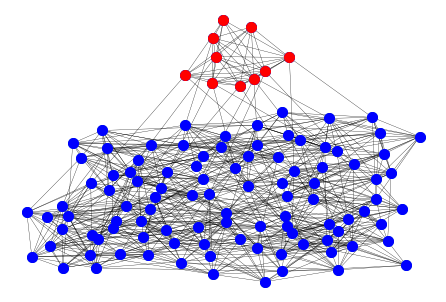

In [7]:
pos=nx.spring_layout(H)
#labels=nx.draw_networkx_labels(H, pos)
nx.draw(H, pos, node_size=100, width=0.3)
nx.draw_networkx_nodes(H, pos, nodelist=nblue, node_color='b', node_size=100)
plotting=nx.draw_networkx_nodes(H, pos, nodelist=nred, node_color='r', node_size=100)

#### We now initiate a random walk from a true node (verifier). We can stop the walk after a pre-determined amount of steps or when we find ourselves back at the start node. All the nodes that are visited in the walk are considered "verified".

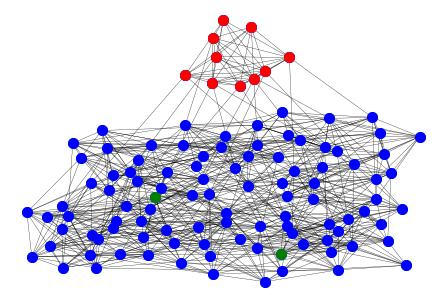

In [8]:
## SINGLE RANDOM WALK ##
import random
start_node=23
random_walk=[start_node]
current_node=random.choice(list(H.neighbors(start_node)))
while current_node!=start_node:
    random_walk.append(current_node)
    current_node=random.choice(list(H.neighbors(current_node)))

#labels=nx.draw_networkx_labels(H, pos)
nx.draw(H, pos, node_size=100, width=0.3)
nx.draw_networkx_nodes(H, pos, nodelist=nblue, node_color='b', node_size=100)
nx.draw_networkx_nodes(H, pos, nodelist=nred, node_color='r', node_size=100)
nx.draw_networkx_nodes(H, pos, nodelist=random_walk, node_color='g', node_size=100)

#### Of course, a single walk may be inconclusive. Instead, we may run multiple walks all starting at different verifiers. Then, if a node appears in some percentage of walks, then it is considered verified. Let's assume that the threshold is $0.4$ and that we run $1000$ such walks.

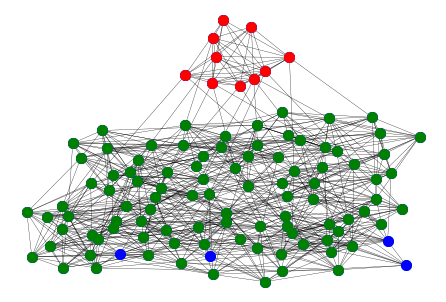

In [9]:
## MULTIPLE RANDOM WALKS ##
import random

nWalks=1000
threshold=0.4

counter={}
for i in H.nodes():
    counter[i]=0
for iter in range(nWalks):
    start_node=random.choice(range(nNodes))
    random_walk=[start_node]
    current_node=random.choice(list(H.neighbors(start_node)))
    while current_node!=start_node:
        random_walk.append(current_node)
        current_node=random.choice(list(H.neighbors(current_node)))

    for i in H.nodes():
        if i in random_walk:
            counter[i]+=1
#pos=nx.spring_layout(H)


green_nodes=[]
for i in H.nodes():
    if counter[i]>threshold*nWalks:
        green_nodes.append(i)

nx.draw(H, pos, node_size=100, width=0.3)
nx.draw_networkx_nodes(H, pos, nodelist=nblue, node_color='b', node_size=100)
nx.draw_networkx_nodes(H, pos, nodelist=nred, node_color='r', node_size=100)
plotting3=nx.draw_networkx_nodes(H, pos, nodelist=green_nodes, node_color='g', node_size=100)


#### We could have identified the Sybil area by following Girvan-Newman's method for partitioning! More on that soon!

In [10]:
G=H.copy()

In [11]:
w = nx.edge_betweenness_centrality(H, k=None, normalized=True)
while nx.is_connected(H):
    maxEdge=max(w, key=w.get)
    w[maxEdge]=-0.1
    if (maxEdge[0], maxEdge[1]) in H.edges():
        H.remove_edge(maxEdge[0], maxEdge[1])
    elif (maxEdge[1], maxEdge[0]) in H.edges():
        H.remove_edge(maxEdge[1], maxEdge[0])
    
nodeSets=[]
components=nx.connected_components(H)
x=[c for c in sorted(nx.connected_components(H), key=len, reverse=True)]
#print(x)
    

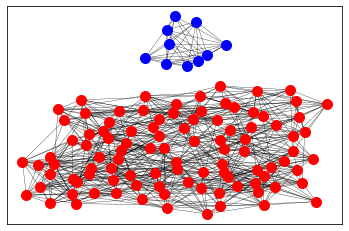

In [12]:
colors=['r', 'b']

for i in range(len(x)):
    nx.draw_networkx_nodes(G, pos, nodelist=x[i], node_color=colors[i], node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=H.edges(), width=0.3)